<a href="https://colab.research.google.com/github/RidouanBani/Pytorch_ML/blob/master/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install **torch**

In [30]:
!pip install torch

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [32]:
n_pts = 500
X, y= datasets.make_circles(n_samples=n_pts,random_state=123, noise=0.1, factor=0.2)
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(500,1))

In [33]:

def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0],X[y==1, 1])

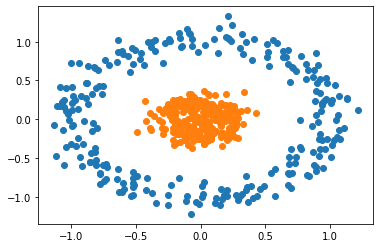

In [34]:
scatter_plot()

In [35]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

In [58]:
torch.manual_seed(2)
model = Model(2, 3, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683]], requires_grad=True), Parameter containing:
tensor([-0.0813, -0.5717,  0.1614], requires_grad=True), Parameter containing:
tensor([[-0.5112,  0.0759,  0.0384]], requires_grad=True), Parameter containing:
tensor([-0.1270], requires_grad=True)]


In [59]:
creterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [60]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = creterion(y_pred,y_data)
  #print("epoch:", i, "loss:",loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

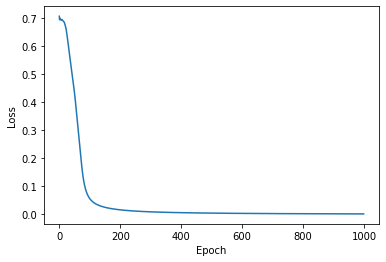

In [61]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [62]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:,0]),max(X[:,0]))
  y_span = np.linspace(min(X[:,1]),max(X[:,1]))
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

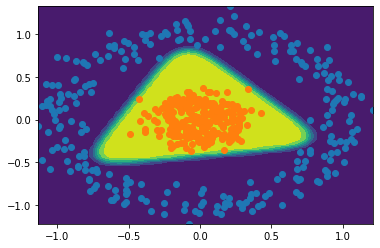

In [63]:
plot_decision_boundary(X, y)
scatter_plot()

tensor([0.9997], grad_fn=<SigmoidBackward>)


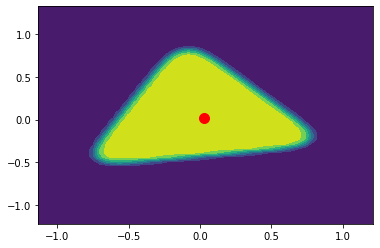

In [68]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.forward(point)
plt.plot([x],[y], marker = 'o', markersize = 10, color = "red")
print(prediction)
plot_decision_boundary(X, y)